# Trabajo Final Biología Computacional
por: Juliana Madrigal Vélez

## Introducción
En el genoma hay diferentes tipos de genes, pero el RNA ribosomal 16S (16S rRNA) compone la subunidad pequeña 30S de los ribosomas procariotas y dentro de este hay unos genes que la codifican que se les llama 16S rRNA y se utilizan para reconstruir filogenias. 

La secuenciación 16S rRNA basada en NGS es una técnica que no precisa de cultivos para conocer la comunidad microbiana de tu muestra. Está basada en la presencia del gen 16S en todas las bacterias y la conservación universal de algunas regiones. Permite el diseño de pares de primers capaces de amplificar regiones específicas de prácticamente todos los genes 16S bacterianos
La especificidad del gen 16S en algunas regiones variables hace posible la identificación de las bacterias a un nivel taxonómico suficientemente informativo.

Candidatus en taxonomía es un término formal que se coloca antes del género y la especie de una bacteria que no puede mantenerse en una "Colección de Cultivo Bacteriológico".

En  los  últimos  años,  síntomas  en  plantas que inicialmente se habían atribuido a virus,  fitoplasmas o incluso insectos, se  han asociado a un género de bacterias del floema,  denominado Candidatus Liberibacter (CL). Este grupo comprende bacterias incapaces de crecer en los medios de cultivo utilizados actualmente, razón por la cual se utiliza el término formal Candidatus antecediendo  al  nombre  del  género Liberibacter,  que  procede  del  término  latino liber (corteza).Los  CL  son  bacterias  gram  negativas  de la  clase  Alphaproteobacteria,  del  orden Rhizobiales y de la familia Rhizobiaceae y son parásitos obligados de plantas e insectos. En la actualidad se han descrito ocho especies  de Liberibacter:  Ca.  Liberibacter africanus  (CLaf), Ca.  Liberibacter  americanus (CLam) y Ca. Liberibacter asiaticus (CLas)  que  causan  el  “Huanglongbing” (HLB)  o citrus  greening  en  cítricos; Ca.  Liberibacter   solanacearum   (CLso)   que afecta a solanáceas y apiáceas y Ca. Liberibacter caribbeanus (CLca), Ca. Liberibacter  europeous  (CLeu)  y Ca.  Liberibacter brunswickensis  (CLbr),  asociadas  a  cítri-cos,  peral  y  psílidos  de  berenjena  y  otras solanáceas,  respectivamente.  Ninguna  de estas  tres  últimas  especies  está  claro  que produzcan  enfermedad  en  los  cultivos  en los  que  se  las  ha  detectado.  Finalmente,  Liberibacter  crescens  (Lcr),  asociada  a  papaya  de  montaña,  es  la  única  especie  que puede crecer en medio de cultivo axénico, por lo que se utiliza como modelo de estudio en las investigaciones sobre la biología de CL, aunque tampoco ha sido identificada como patógena de plantas. 

Las secuencias de ADN y proteína definen la función de las proteínas en los seres vivos. Cuanto más similares sean dos secuencias más similares tenderán a ser las funciones de las proteínas codificadas por ellas.Las secuencias de un mismo gen en un conjunto de especies serán más distintas cuanto más alejadas filogenéticamente estén las especies comparadas.

## Pregunta biológica
¿Se puede extraer de las bacterias el gen 16S rRNA, para el uso de alineamientos y reconstrucción filogenetica?
¿Al ser Candidatus Liberibacter spp. una bacteria no muy conocida y no cultivable, con la información existente se le puede realizar dicho proceso de análisis bioinformático?

## Metodología y Resultados
Lo que se quiere realizar es una extracción del gen 16S de cualquier genoma de bacterias por medio de una función con el uso de biopython, luego se quiere poner dichos genes en un archivo para realizar un alineamiento y su posterior reconstrucción filogenética con especies que se creen que estan cercanamente emparentadas. Lo que se hace es un acercamiento a esto porque Biopython no tiene incluida dicha función en sus caracteristicas y me pareció importante obtenerla para futuros estudios, si requiere de perfeccionar para casos mas específicos e irlo mejorando para tener cada vez análisis mas precisos y más confiables.

Antes de realizar la siguiente función se debe ingresar al GenBank y descargar la secuencia del genoma de interés, en este caso será la de varias especies de Candidatus.

In [97]:
#Ideas para código de extraer del gemona el Gen 16S
#Idea 1 como función para guardar en diccionario
def Extract16S(record):
    rRNAs=[]
    for genome in record:
        for gene in genome.features:
            if gene.type=='rRNA': 
                if 'product' in gene.qualifiers:
                    if '16S' in gene.qualifiers['product'][0]:
                        start = gene.location.nofuzzy_start
                        end = gene.location.nofuzzy_end
                        if 'db_xref' in gene.qualifiers:
                            gi=[]
                            gi=str(gene.qualifiers['db_xref'])
                            gi=gi.split(":")[1]
                            gi=gi.split("'")[0]
                            OP1=(">GeneId|%s|16S rRNA|%s\n%s" % (gi,genome.description,genome.seq[start:end]))
                        else:
                            OP2=(">GeneId|NoGenID|16S rRNA|%s\n%s" % (genome.description,genome.seq[start:end]))
                        
                        
                        return rRNAs.append(OP1 or OP2)

Para aplicarlo a la bacteria de interés:

In [98]:
#Candidatus Amoebophilus asiaticus 5a2, complete genome
from Bio import SeqIO, SeqFeature
record=SeqIO.parse("sequence.gb","genbank")
output_handle=open("rRNAs.fa","w")

SeqIO.write(record, "rRNAs.fa", "fasta")
output_handle.close()

FileNotFoundError: [Errno 2] No such file or directory: 'sequence.gb'

In [99]:
#Como función sin Guardar...
def Extract16S(record):
    for genome in record:
        for gene in genome.features:
            if gene.type=='rRNA': 
                if 'product' in gene.qualifiers:
                    if '16S' in gene.qualifiers['product'][0]:
                        start = gene.location.nofuzzy_start
                        end = gene.location.nofuzzy_end
                        if 'db_xref' in gene.qualifiers:
                            gi=[]
                            gi=str(gene.qualifiers['db_xref'])
                            gi=gi.split(":")[1]
                            gi=gi.split("'")[0]
                            OP1=(">GeneId|%s|16S rRNA|%s\n%s" % (gi,genome.description,genome.seq[start:end]))
                        else:
                            OP2=(">GeneId|NoGenID|16S rRNA|%s\n%s" % (genome.description,genome.seq[start:end]))
                               
                        return (OP1 or OP2)

In [100]:
from Bio import SeqIO, SeqFeature
record=SeqIO.parse("sequence.gb","genbank")
Extract16S(record)

FileNotFoundError: [Errno 2] No such file or directory: 'sequence.gb'

Idea 1 para imprimir y ver resultado (no es como función pero es para los casos que se quiera ver el resultado de inmediato), esta es la forma que usaremos en este trabajo:

In [101]:
#Candidatus Amoebophilus asiaticus 5a2, complete genome
from Bio import SeqIO, SeqFeature

gbank=SeqIO.parse("Candidatus Amoebophilus asiaticus 5a2, complete genome.gb","genbank")

for genome in gbank:
    for gene in genome.features:
        if gene.type=='rRNA': 
            if 'product' in gene.qualifiers:
                if '16S' in gene.qualifiers['product'][0]:
                    start = gene.location.nofuzzy_start
                    end = gene.location.nofuzzy_end
                    if 'db_xref' in gene.qualifiers:
                        gi=[]
                        gi=str(gene.qualifiers['db_xref'])
                        gi=gi.split(":")[1]
                        gi=gi.split("'")[0]
                        
                        print (">GeneId|%s|16S rRNA|%s\n%s" % (gi,genome.description,genome.seq[start:end]))
                    else:
                        print (">GeneId|NoGenID|16S rRNA|%s\n%s" % (genome.description,genome.seq[start:end]))

>GeneId|NoGenID|16S rRNA|Candidatus Amoebophilus asiaticus 5a2, complete genome
ATGGAGAGTTTGATCCTGGCTCAGGATGAACGCTAGCGGCAGGCCTCATACATGCAAGTCGAGGGGCAGCAGGACACTTCGGTGTTGCTGGCGACCGGCGCACGGGTGCGTAACACGTATGCAATCTACCTTGTACTGGAGCATAGCTCTCGGAAACGAGAATTAATACTCCATATGATCTCATTAACACATGTTAGAGAGATGAAAGCTCCGGCGGTACAAGATGAGCATGCGTCCCATTAGCTAGTTGGTGAGGTAACGGCTCACCAAGGCGACGATGGGTAGGGGTTCTGAGAGGAAGATCCCCCACACTGGCACTGAGATACGGGCCAGACTCCTACGGGAGGCAGCAGTAGGGAATATTGGTCAATGGGCGCAAGCCTGAACCAGCCATGCCGCGTGCAGGATGAAGGCCCTCAGGGTTGTAAACTGCTTTTATATGGAAATAAAAAGCCCTTGCGAGGGTTATTGAAGGTACCATAAGAATAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTATCCGGATTTACTGGGTTTAAAGGGTGCGTAGGCGGCTCTTTAAGTCAGTGGTGAAAGCCTAGTGCTTAACACTAGAATTGCCATTGAAACTGAAGAGCTTGAGTCAAGGAGAGGTAAGCAGAATTTATGGTGTAGCAGTGAAATGCTTAGATACCATAAGGAATACCAATAGCGAAGGCAGCTTACTGGCCTTGCACTGACGCTGAGGCACGAAAGCGTGGGGAGCAAACAGGATTAGAGACCCTGGTAGTCCACGCTGTAAACGATGATCACTCGATATACATACTTGATATGTGTGTCTGAGCGAAAGCATTAAGTGATCCACCTGGGGAGTACGCCCGCAAGAGTGAAACTCAAAGGAATTGACGGGGGTCCGC

In [102]:
#Candidatus Blochmannia vafer str. BVAF, complete genome
from Bio import SeqIO, SeqFeature

gbank=SeqIO.parse("Candidatus Blochmannia vafer str. BVAF, complete genome.gb","genbank")

for genome in gbank:
    for gene in genome.features:
        if gene.type=='rRNA': 
            if 'product' in gene.qualifiers:
                if '16S' in gene.qualifiers['product'][0]:
                    start = gene.location.nofuzzy_start
                    end = gene.location.nofuzzy_end
                    if 'db_xref' in gene.qualifiers:
                        gi=[]
                        gi=str(gene.qualifiers['db_xref'])
                        gi=gi.split(":")[1]
                        gi=gi.split("'")[0]
                        
                        print (">GeneId|%s|16S rRNA|%s\n%s" % (gi,genome.description,genome.seq[start:end]))
                    else:
                        print (">GeneId|NoGenID|16S rRNA|%s\n%s" % (genome.description,genome.seq[start:end]))

>GeneId|NoGenID|16S rRNA|Candidatus Blochmannia vafer str. BVAF, complete genome
TTAAGTAAGGAGGTGATCCAACCGCAGGTTCCCCTACGGTTACCTTGTTACGACTTCACCCCAGTCATGAATCACAAAGTGGTAAGCGCCCTCCCTTTATTACAGCAGGGTTAAACAACTTACTTCTTTTGCAACCCACTTCCATGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGTGACATTCTGATCCACGATTACTAGCGATTCCGACTTCATGGAGTCGAGTTGCAGACTCCAATCCGGACTAAGACGTACTTTATGAGGTTTGCTAACTTTCACAAGATCGCTTCTCTTTGTATACGCCATTGTAGCACGTTTGTAGCCCTACTCATAAGGGCCATGATGACTTGACGTCATCCTCACCTTCCTCCGGTTTATCACCGGCAGTCTCCTTTGAGTTCCCGACTTTACTCGTTGGCAACAAAGGATAAGGGTTGCGCTCGTTGCGGGACTTAACCCAACATTTCACAACACGAGCTGACGACAGCCATGCAGCACCTGTCTCAAAGTTCCCGAAGGCACCCACATATCTCTATGTAGTTCTTTGGATGTCAAGAGTAGGTAAGGTTCTTCGTGTTGCATCGAATTAAACCACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCATTTGAGTTTTAACCTTGCGGTCGTACTCCCCAGGCGGTCGATTTAACGCGTTAGCTCCGAAAGCCACAACTTATAGTCACAACCTTCAAATCGACATCGTTTACAGCATGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCATGCTTTCGTACCTGAGTGTCAGTTTTCGCCCAGGGGGTCGCCTTCGCCACTGGTATTCCTCCAGATCTCTACGCATTTCACCGCTACACCTGGAATTCTACCCCCCTCTACGAAACTCTAGCCTATCAGTTT

In [103]:
#Candidatus Cloacamonas acidaminovorans str. Evry provisional genome sequence from WWE1 candidate division
from Bio import SeqIO, SeqFeature

gbank=SeqIO.parse("Candidatus Cloacamonas acidaminovorans str. Evry provisional genome sequence from WWE1 candidate division.gb","genbank")

for genome in gbank:
    for gene in genome.features:
        if gene.type=='rRNA': 
            if 'product' in gene.qualifiers:
                if '16S' in gene.qualifiers['product'][0]:
                    start = gene.location.nofuzzy_start
                    end = gene.location.nofuzzy_end
                    if 'db_xref' in gene.qualifiers:
                        gi=[]
                        gi=str(gene.qualifiers['db_xref'])
                        gi=gi.split(":")[1]
                        gi=gi.split("'")[0]
                        
                        print (">GeneId|%s|16S rRNA|%s\n%s" % (gi,genome.description,genome.seq[start:end]))
                    else:
                        print (">GeneId|NoGenID|16S rRNA|%s\n%s" % (genome.description,genome.seq[start:end]))

>GeneId|NoGenID|16S rRNA|Candidatus Cloacamonas acidaminovorans str. Evry provisional genome sequence from WWE1 candidate division
TATAAAGGAGGTGATCCAGCCGCACCTTCCGGTACGGCTACCTTGTTACGACTTAGTCCTCCTCGCAAAGCACACCTTCGAAAGCTGCTTCCCTCACGGGTTAGCTCACCTCCTTCGGGTGCACTCCACTCGGCTGACTTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCACCATGATGTTGCGCGATTACTAGCGATTCCGGCTTCATGAGGTCGAGTTGCAGACCTCAATCCGAACTTGGGTAGCTTTTCTGAGATTCGCTCCACATCACTGCTTCGCTCCCCTCTGTAACTACCATTGTAGCACGTGTGTAGCCCCGGTCATAAGGACCATGATGACTTGACCTCGTCCCCATCTTCCTCTGCGTTGTTACCGCAGCGGTCCTTCCAGAGTCCCCAACTTAATGATGGCAACTGAAAGCAGGGGTTGCGCTCGTTGCGGGACTTAACCCAACATCTCACGACACGAGCTGACGACAGCCATGCAGCACCTGTCTTGCAGCTCCGGCAAACCGGCACTCCTCCATCTCTGAAGAATTCTGCAGATGTCAAGACCGGGTAAGGTTCTTCGCGTTGCGTCGAATTAAACCACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCCTTTGAGTTTCAACCTTGCGATCGTACTCCCCAGGCGAATCACTTATCGCGTTAGCTCCGGCACCGAGTCCTATACGAACCCAACACCTAGTGATTATCGTTTACTGTGTGGACTACCAGGGTATCTAATCCTGTTTGATCCCCACACCTTCGCAGTTTAGCGTCAATATCGGCTTAGAAGACTGCCTTCGCCTTCGGTATTCCTCCTGATCTCTGCGCATTCCACCGCTACA

In [104]:
#Candidatus Ishikawaella capsulata Mpkobe DNA
from Bio import SeqIO, SeqFeature

gbank=SeqIO.parse("Candidatus Ishikawaella capsulata Mpkobe DNA.gb","genbank")

for genome in gbank:
    for gene in genome.features:
        if gene.type=='rRNA': 
            if 'product' in gene.qualifiers:
                if '16S' in gene.qualifiers['product'][0]:
                    start = gene.location.nofuzzy_start
                    end = gene.location.nofuzzy_end
                    if 'db_xref' in gene.qualifiers:
                        gi=[]
                        gi=str(gene.qualifiers['db_xref'])
                        gi=gi.split(":")[1]
                        gi=gi.split("'")[0]
                        
                        print (">GeneId|%s|16S rRNA|%s\n%s" % (gi,genome.description,genome.seq[start:end]))
                    else:
                        print (">GeneId|NoGenID|16S rRNA|%s\n%s" % (genome.description,genome.seq[start:end]))

>GeneId|NoGenID|16S rRNA|Candidatus Ishikawaella capsulata Mpkobe DNA, complete genome
AAATTGAAGAGTTTGATCATGGCTCAGATTGAACGCTAGCGGCAAGCTTAACACATGCAAGTCGAACGGTAACAGAAAAAAGCTTGCTTTTTTGCTGACGAGTGGCGGACGGGTGAGTAATGTCTGGGGATCTACCTAATGGCGGGGGATAACTACTGGAAACGGTAGCTAATACCGCATAATGTTGTAAAACCAAAGTGGGGGACCTTATGGCCTCACACCATTAGATGAACCTAGATGGGATTAGCTTGTAGGTGGGGTAAAGGCTCACCTAGGCAACGATCCCTAGCTGGTCTGAGAGGATGACCAGCCACACTGGAACTGAGATACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATCTTGCACAATGGGCGCAAGCCTGATGCAGCTATGTCGCGTGTATGAAGAAGGCCTTAGGGTTGTAAAGTACTTTCATCGGGGAAGAAGGATATGAGCCTAATATTCTCATATATTGACGTTACCTGCAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAACACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGAGCACGTAGGTGGTTTATTAAGTCATATGTGAAATCCCTGGGCTTAACCTAGGAACTGCATGTGAAACTGATAAACTAGAGTTTCGTAGAGGGAGGTGGAATTCCAGGTGTAGCGGTGAAATGCGTAGATATCTGGAGGAATATCAGAGGCGAAGGCGACCTTCTGGACGAAAACTGACACTCAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCTGTAAACAATGTCGACTAAAAAACTGTGAGCTTGACTTGTGGTTTTTGTAGCTAACGCATTAAGTCGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCA

In [105]:
#Candidatus Liberibacter asiaticus str. psy62, complete genome
from Bio import SeqIO, SeqFeature

gbank=SeqIO.parse("Candidatus Liberibacter asiaticus str. psy62, complete genome.gb","genbank")

for genome in gbank:
    for gene in genome.features:
        if gene.type=='rRNA': 
            if 'product' in gene.qualifiers:
                if '16S' in gene.qualifiers['product'][0]:
                    start = gene.location.nofuzzy_start
                    end = gene.location.nofuzzy_end
                    if 'db_xref' in gene.qualifiers:
                        gi=[]
                        gi=str(gene.qualifiers['db_xref'])
                        gi=gi.split(":")[1]
                        gi=gi.split("'")[0]
                        
                        print (">GeneId|%s|16S rRNA|%s\n%s" % (gi,genome.description,genome.seq[start:end]))
                    else:
                        print (">GeneId|NoGenID|16S rRNA|%s\n%s" % (genome.description,genome.seq[start:end]))

>GeneId|NoGenID|16S rRNA|Candidatus Liberibacter asiaticus str. psy62, complete genome
AACATCTTCCTTAGAAAGGAGGTGATCCAGCCGCAGGTTCCCCTACGGCTACCTTGTTACGACTTCACCCCAGTCGCTGACCCTACCGTGGCCGGCTGCCTCCTTGCGGTTAGCACACCGTCTTCAGGCAAAACCAACTCCCATGGTGTGACGGGCGGTGTGTACAAGGCCCGAGAACGTATTCACCGCGGCATGCTGATCCGCGATTACTAGCGATTCCGACTTCATGCACTCGAGTTGCAGAGTGCAATCCGAACTGAGATGGCTTTTGGGGATTAGCTCCGCCTCGCGACTTCGCAACCCATTGTAACCACCATTGTAGCACGTGTGTAGCCCAGCCCATAAGGGCCATGAGGACTTGACGTCATCCCCACCTTCCTCCGGCTTATCACCGGCAGTCCCTATAAAGTACCCAACATCTAGGTAAAAACCTAAACTTGATGGCAACTAGAGGCAGGGGTTGCGCTCGTTGCGGGACTTAACCCAACATCTCACGACACGAGCTGACGACAGCCATGCAGCACCTGTGTAAAGGTCTCCGAAAAGAAAATACCATCTCTGATATCGTCCTATACATGTCAAGGGCTGGTAAGGTTCTGCGCGTTGCATCGAATTAAACCACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCCTTTGAGTTTTAATCTTGCGACCGTACTCCCCAGGCGGAGTGCTTAATGCGTTAGCTGCGCCACTGAATGGTAAACCACCCAACAGCTAGCACTCATCGTTTACGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGCGCCTCAGCGTCAGTATCAGGCCAGTGAGCCGCCTTCGCCACCGGTGTTCCTCCGAATATCTACGAATTTCACCTCTACACTCGGAATTCCACTCACCTCTCCTA

In [106]:
#Candidatus Phytoplasma mali strain AT complete chromosome
from Bio import SeqIO, SeqFeature

gbank=SeqIO.parse("Candidatus Phytoplasma mali strain AT complete chromosome.gb","genbank")

for genome in gbank:
    for gene in genome.features:
        if gene.type=='rRNA': 
            if 'product' in gene.qualifiers:
                if '16S' in gene.qualifiers['product'][0]:
                    start = gene.location.nofuzzy_start
                    end = gene.location.nofuzzy_end
                    if 'db_xref' in gene.qualifiers:
                        gi=[]
                        gi=str(gene.qualifiers['db_xref'])
                        gi=gi.split(":")[1]
                        gi=gi.split("'")[0]
                        
                        print (">GeneId|%s|16S rRNA|%s\n%s" % (gi,genome.description,genome.seq[start:end]))
                    else:
                        print (">GeneId|NoGenID|16S rRNA|%s\n%s" % (genome.description,genome.seq[start:end]))

>GeneId|NoGenID|16S rRNA|Candidatus Phytoplasma mali strain AT complete chromosome
TATATTAAGAGTTTGATCCTGGCTCAGGATGAACGCTGGCGGCGTGCCTAATACATGCAAGTCGAACGGAAACTTTTAGTTTCAGTGGCGAACGGGTGAGTAACACGTAAGTAACCTGCCTCTTAGACGAGGATAACAGTTGGAAACGACTGCTAAGACTGGATAGGAAGTTTTAAGGCATCTTGAAACTTTTAAAAGACCCGCAAGGGTATGCTAAGAGATGGGCTTGCGGCACATTAGTTAGTTGGTAAGGTAACGGCTTACCAAGACTATGATGTGTAGCTGGACTGAGAGGTTGAACGGCCACATTGGGATTGAGATACGGCCCAAACTCCTACGGGAGGCAGCAGTAAGGAATTTTCGGCAATGGAGGAAACTCTGACCGAGCAACGCCGCGTGAACGATGAAATATTTAGGTATGTAAAGTTCTTTTATTAAAGAAGAAAAAATGATGGAAAAATCATTCTGACGGTATTTAATGAATAAGCCCCGGCTAACTATGTGCCAGCAGCTGCGGTAATACATGGGGGGCAAGCGTTATCCGGATTTATTGGGCGTAAAGGGTGTGTAGGCGGTTTAATAAGTCTATGGTATAAGTTCAACGCTTAACGTTGTGATGCTATGGAAACTGTTTGACTAGAGTTGGATAGAGGCAAGTGGAATTCCATGTGTAGCGGTAAAATGCGTAAATATATGGAGGAACACCAGTAGCGAAGGCGGCTTGCTGGGTCTTAACTGACGCTGAGGCACGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGAGTACTAAGTGTTGGGTTAAACCAGTGCTGAAGTTAACACATTAAGTACTCCGCCTGAGTAGTACGTACGCAAGTATGAAACTTAAAGGAATTGACGGGACTCCGCACAA

Todas las secuencias del Gen 16S anteriores fueron guardadas en un documento .fasta y luego otro documento .txt para posteriores usos.

Como traer del GenBank y usarlo en el código creado(Buscamos a E. coli):

In [107]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email = "jmadrig2@eafit.edu.co" 
handle = Entrez.einfo()
result = Entrez.read(handle)
handle.close()

In [108]:
handle = Entrez.esearch(db="nucleotide", term="U00096", idtype="acc")
record = Entrez.read(handle)
record["Count"]

'1'

In [109]:
id_list = record["IdList"]
print(id_list)

['U00096.3']


In [110]:
handle = Entrez.efetch(db="nucleotide", id=id_list[0], rettype="gb", retmode="text")
my_gb = SeqIO.parse(handle, "genbank")

Si lo traigo asi del genbank sale como un diccionario que no tiene atributo de features, este codigo no serviria para eso, por eso mas abajo se desarrolla uno mas adecuado (acá usamos como ejemplo a E.coli):

In [111]:
from Bio import SeqIO, SeqFeature

for genome in my_gb:
    for gene in genome.features:
        if gene.type=='rRNA': 
            if 'product' in gene.qualifiers:
                if '16S' in gene.qualifiers['product'][0]:
                    start = gene.location.nofuzzy_start
                    end = gene.location.nofuzzy_end
                    if 'db_xref' in gene.qualifiers:
                        gi=[]
                        gi=str(gene.qualifiers['db_xref'])
                        gi=gi.split(":")[1]
                        gi=gi.split("'")[0]
                        
                        print (">GeneId|%s|16S rRNA|%s\n%s" % (gi,genome.description,genome.seq[start:end]))
                    else:
                        print (">GeneId|NoGenID|16S rRNA|%s\n%s" % (genome.description,genome.seq[start:end]))

>GeneId|ABE-0000677|16S rRNA|Escherichia coli str. K-12 substr. MG1655, complete genome
AAATTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAACGGTAACAGGAAGAAGCTTGCTTCTTTGCTGACGAGTGGCGGACGGGTGAGTAATGTCTGGGAAACTGCCTGATGGAGGGGGATAACTACTGGAAACGGTAGCTAATACCGCATAACGTCGCAAGACCAAAGAGGGGGACCTTCGGGCCTCTTGCCATCGGATGTGCCCAGATGGGATTAGCTAGTAGGTGGGGTAACGGCTCACCTAGGCGACGATCCCTAGCTGGTCTGAGAGGATGACCAGCCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGCGTGTATGAAGAAGGCCTTCGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGGAGTAAAGTTAATACCTTTGCTCATTGACGTTACCCGCAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCGACTTGGAGGTTGTGCCCTTGAGGCGTGGCTTCCGGAGCTAACGCGTTAAGTCGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTC

Idea 2 para casos en que el código anterior no funcione, este no guarda como archivo aparte porque no da la función para dicho objetivo:

In [112]:
#Nucleotidos de Candidatus liberibacter:
from Bio import Entrez
Entrez.email= "jmadrig2@eafit.edu.co"
handle = Entrez.efetch(db="nucleotide", id="FJ263695", rettype="gb", retmode="xml")
record = Entrez.read(handle)
handle.close()
for dic in record[0]["GBSeq_feature-table"]:
    if dic["GBFeature_key"] == "rRNA":
        for subdic in dic["GBFeature_quals"]:
            if subdic["GBQualifier_value"]=="16S ribosomal RNA":
                de = int(dic["GBFeature_intervals"][0]["GBInterval_from"])
                a =int(dic["GBFeature_intervals"][0]["GBInterval_to"])
                result=(record[0]["GBSeq_sequence"][de:a])
                print(result)

gattttattggagaaagatgaacccgcgttagattagctagttggtggggtaaaggcctaccaaggcgatgatctatagctggtctgagaggacgatcagccacactgggactgagacacggcccagactcctacgggaggcagcagtggggaatattggacaatgggggcaaccctgatccagccatgccgcgtgagtgaagaaggccttagggttgtaaagctctttcgccggagaagataatgacggtaaccggagaagaagccccggctaacttcgtgccagcagccgcggtaatacgaagggggcgagcgttgttcggaataactgggcgtaaagggtgcgtaggcgggcgattaagctagaggtgaaatcccaaggctcaaccttggaactgcctttaatactgtttgtctagagttcaggagaggtgagcggaattccgagtggagaggtgaaattcgttgatattcggaggaacaccagtggcgaaggcggctcactggcctgatactgacgctgaggcacgaaagcgtggggagcaaacaggattagataccctggtagtccacgctgtaaacgatgagtgctagctgttgggtggtttaccattcagtggcgcagctaacgcgttaagcactccgcctggggagtacggtcgcaagattaaaactcaaaggaattgacgggggcccgcacaagcggtggagcatgtggtttaattcgatgcaacgcgcagaaccttaccagcccttgacatggtgggacgatatcagagatgatattttcttttcggagacccacacacaggtgctgcatggctgtcgtcagctcgtgtcgtgagatgttgggttaagtcccgcaacgagcgcaacccctgcctatatttgccatcattaagttgggaactttatagggactgccggtgataagccggaggaaggtggggatgacgtcaagtcctcatggcccttatgggctgggctacacacgtgctac

In [113]:
#Genoma de E.coli
from Bio import Entrez
Entrez.email= "jmadrig2@eafit.edu.co"
handle = Entrez.efetch(db="nucleotide", id="U00096", rettype="gb", retmode="xml")
record = Entrez.read(handle)
handle.close()
for dic in record[0]["GBSeq_feature-table"]:
    if dic["GBFeature_key"] == "rRNA":
        for subdic in dic["GBFeature_quals"]:
            if subdic["GBQualifier_value"]=="16S ribosomal RNA":
                de = int(dic["GBFeature_intervals"][0]["GBInterval_from"])
                a =int(dic["GBFeature_intervals"][0]["GBInterval_to"])
                print(record[0]["GBSeq_sequence"][de:a])
           

aattgaagagtttgatcatggctcagattgaacgctggcggcaggcctaacacatgcaagtcgaacggtaacaggaagaagcttgcttctttgctgacgagtggcggacgggtgagtaatgtctgggaaactgcctgatggagggggataactactggaaacggtagctaataccgcataacgtcgcaagaccaaagagggggaccttcgggcctcttgccatcggatgtgcccagatgggattagctagtaggtggggtaacggctcacctaggcgacgatccctagctggtctgagaggatgaccagccacactggaactgagacacggtccagactcctacgggaggcagcagtggggaatattgcacaatgggcgcaagcctgatgcagccatgccgcgtgtatgaagaaggccttcgggttgtaaagtactttcagcggggaggaagggagtaaagttaatacctttgctcattgacgttacccgcagaagaagcaccggctaactccgtgccagcagccgcggtaatacggagggtgcaagcgttaatcggaattactgggcgtaaagcgcacgcaggcggtttgttaagtcagatgtgaaatccccgggctcaacctgggaactgcatctgatactggcaagcttgagtctcgtagaggggggtagaattccaggtgtagcggtgaaatgcgtagagatctggaggaataccggtggcgaaggcggccccctggacgaagactgacgctcaggtgcgaaagcgtggggagcaaacaggattagataccctggtagtccacgccgtaaacgatgtcgacttggaggttgtgcccttgaggcgtggcttccggagctaacgcgttaagtcgaccgcctggggagtacggccgcaaggttaaaactcaaatgaattgacgggggcccgcacaagcggtggagcatgtggtttaattcgatgcaacgcgaagaaccttacctggtcttgacatccac

## Análisis de Resultados

### Resumen de lo que se hizo en la idea 1:
- Extraer registo de un genoma para ficha, usando id de la "americana", en formato acc. O descargandolo directo de la página web.
- Buscar la clave genome.features que es donde se encuentran las secuencias, si el tipo es rRNa, buscar en gene.qualifieres a ver si hay producto.
- Extraer la posicion inicial y final y cortar allí para sacar el fragmento y guardarlo en una lista.
- Dar indicaciones para la extracción del fragmento con su título correspndiente para fácil ubicación.
                        
### Resumen de lo que se hizo en la idea 2:

- Extraer registo de nucleótidos para ficha, usando id de la "americana", en formato XML.
- Buscar la clave "GBSeq_feature-table", que es donde se encuentran las secuencias.
- Buscar en las secuencias tipo "rRNA", aquella que se llame "16S ribosomal RNA".
- Extraer la posición inicial y final
- Ir a la secuencia genómica y sacar el fragmento

En este caso se extrajo el Gen 16S y para cada caso da diferente, por ejemplo, segun el secuenciamiento se encuentran varias secuencias del Gen 16S rRNA y cuando pasa esto hay que elegir la mejor, aunque son similares, la mas indicada sería la mas larga para poder tener un alineamiento mas exacto y con mas probabilidades de alinearse mejor para un análisis mejor realizado.

Alineamiento por medio de Biopython:

In [114]:
#Para ver cuales formas de Alineamientos hay:
import Bio.Align.Applications
dir(Bio.Align.Applications)

['ClustalOmegaCommandline',
 'ClustalwCommandline',
 'DialignCommandline',
 'MSAProbsCommandline',
 'MafftCommandline',
 'MuscleCommandline',
 'PrankCommandline',
 'ProbconsCommandline',
 'TCoffeeCommandline',
 '_ClustalOmega',
 '_Clustalw',
 '_Dialign',
 '_MSAProbs',
 '_Mafft',
 '_Muscle',
 '_Prank',
 '_Probcons',
 '_TCoffee',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

A continuación hay un código para alineamiento porque con los anteriores funciones no daba, saliendo un error porque las secuencias no son del mismo tamaño.

In [115]:
from Bio import AlignIO
from Bio import SeqIO
from Bio import Seq

input_file = 'end.txt'
records = SeqIO.parse(input_file, 'fasta')
records = list(records) 

maxlen = max(len(record.seq) for record in records)

for record in records:
    if len(record.seq) != maxlen:
        sequence = str(record.seq).ljust(maxlen, '.')
        record.seq = Seq.Seq(sequence)
assert all(len(record.seq) == maxlen for record in records)

output_file = '{}_padded.fasta'.format(os.path.splitext(input_file)[0])
with open(output_file, 'w') as f:
    SeqIO.write(records, f, 'fasta')
alignment = AlignIO.read(output_file, "fasta")
print (alignment)

SingleLetterAlphabet() alignment with 6 rows and 1628 columns
ATGGAGAGTTTGATCCTGGCTCAGGATGAACGCTAGCGGCAGGC...... GeneId|NoGenID|16S
TTAAGTAAGGAGGTGATCCAACCGCAGGTTCCCCTACGGTTACC...TTT GeneId|NoGenID|16S
TATAAAGGAGGTGATCCAGCCGCACCTTCCGGTACGGCTACCTT...... GeneId|NoGenID|16S
AAATTGAAGAGTTTGATCATGGCTCAGATTGAACGCTAGCGGCA...... GeneId|NoGenID|16S
AACATCTTCCTTAGAAAGGAGGTGATCCAGCCGCAGGTTCCCCT...... GeneId|NoGenID|16S
TATATTAAGAGTTTGATCCTGGCTCAGGATGAACGCTGGCGGCG...... GeneId|NoGenID|16S


Este es el alineamiento realizado, el cual sirve para realizar análisis filogenéticos, ya sea en python o en otras herramientas.

## Conclusiones
Si se pudo realizar la extracción del gen 16S rRNA por medio de la función creada, además, se pudo encontrar una forma de alineamiento si las secuencias no son del mismo tamaño, como en muchos casos esto puede suceder.
De aqui en adelante, se podria extraer dicho alineamiento en un archuivo externo posible para realizar filogenétca, por cuestioness de tiempo y de interés, no se realizó, pero , por medio del programa MEGA se realizó el arbol filogenético con la extracción del gen 16S rRNA y se obtuvo lo siguiente:

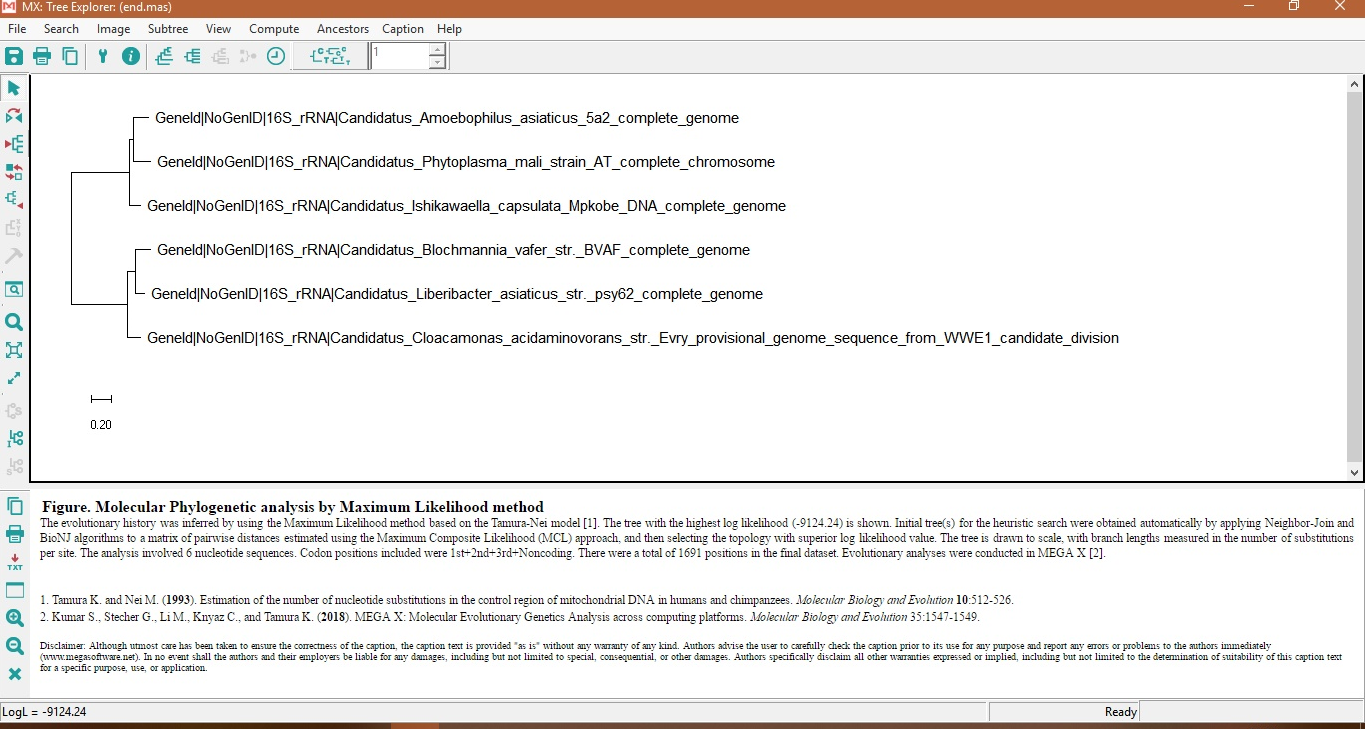

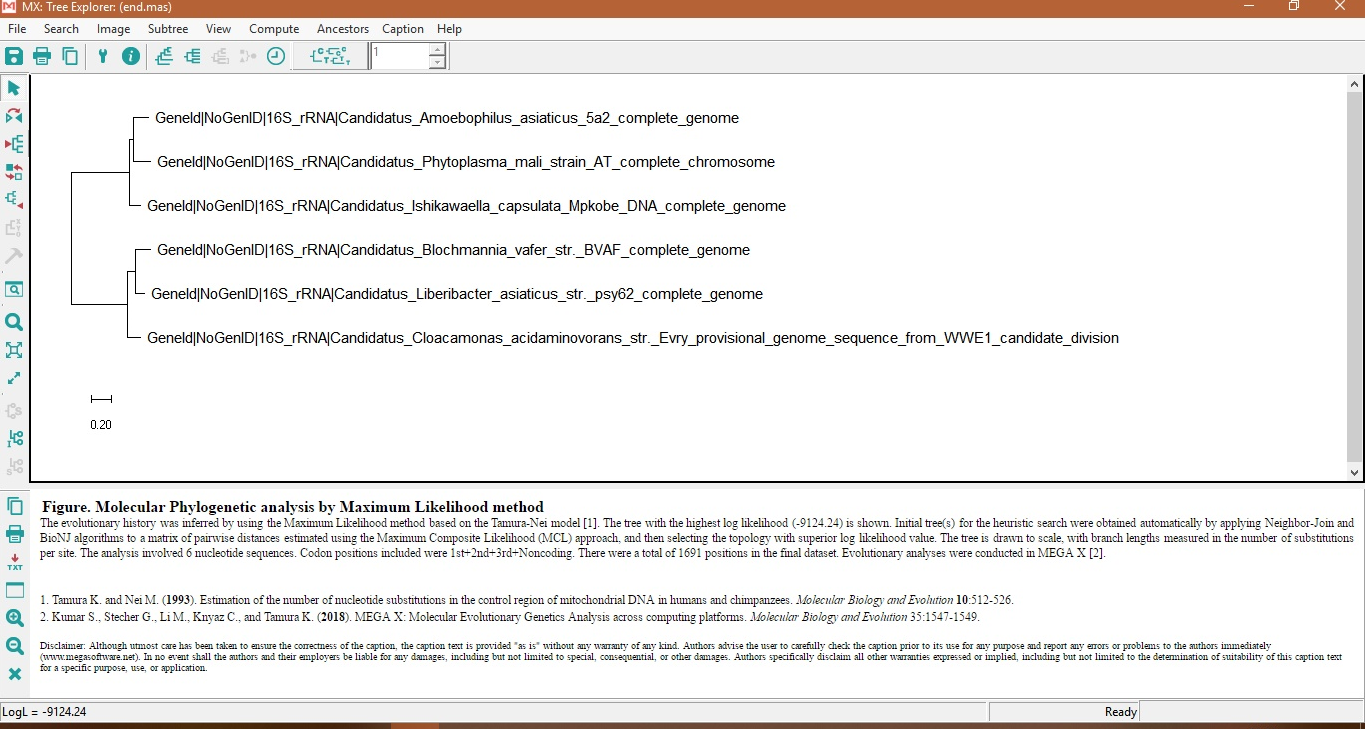

In [6]:
from IPython.display import Image
Image(filename='Tree.PNG')

Según este análisis Candidatus amoebophilus asiaticus y Candidatus phytoplasma mali tienen un ancestro en comun que es Candidatus Ishikawaella capsulata (estando todos en el mismo grupo). Por otro lado, Candidatus Blochmannia vafer y Candidatus Liberibacter asiaticus tienen un ancestro en común que es Candidatus CLoacamonas acidaminovorans (estando todos en el mismo gupo) y por fuera de ellos hay un ancestro comun que no fue identificado en este estudio.

## Referencias

- Ortiz-Estrada, Á. M., Martínez-Porchas, M., & Vargas-Albores, F. La secuencia completa del gen arn ribosomal 16s, una promesa para mejorar la precisión en la asignación taxonómica microbiana. Diagnóstico, tendencias en investigación y áreas de oportunidad, 50.

- Schloss, P. D., Westcott, S. L., Ryabin, T., Hall, J. R., Hartmann, M., Hollister, E. B., ... & Sahl, J. W. (2009). Introducing mothur: open-source, platform-independent, community-supported software for describing and comparing microbial communities. Applied and environmental microbiology, 75(23), 7537-7541.

- https://biopython.org/wiki/Annotate_Entrez_Gene_IDs

- https://coredump.uno/questions/9131884/extract-data-from-gb-file-using-biopython

- https://www.biostars.org/p/83153/

- http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc81

- https://biopython-cn.readthedocs.io/zh_CN/latest/en/chr06.html

- https://stackoverflow.com/questions/32833230/biopython-alignio-valueerror-says-strings-must-be-same-length

- https://eprints.ucm.es/48304/1/ManualJupyter.pdf

- (11) (PDF) Candidatus Liberibacter: agentes causales de enfermedades importantes en cultivos de interés en España.. Available from: https://www.researchgate.net/publication/323178654_Candidatus_Liberibacter_agentes_causales_de_enfermedades_importantes_en_cultivos_de_interes_en_Espana [accessed Nov 20 2018].

- https://bioinf.comav.upv.es/courses/intro_bioinf/alineamientos.html
